In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [15]:

data_575 = pd.read_csv("C:/Users/Dhrumit Patel/College/3402 - Semester 5/COMP 257 - Unsupervised and Reinforcement Learning/Project/normalized_dataframe_575.csv")
# Convert to 2D
data_575_2d = np.array(data_575).reshape(575, 112, 92, 1)

X_train, X_val = train_test_split(data_575_2d, test_size=0.2, random_state=42)
X_train.shape
X_val.shape


(115, 112, 92, 1)

In [17]:
# Adding noise to your data
noise_factor = 0.3
X_train_noisy = X_train + noise_factor * np.random.normal(size=X_train.shape)

# Define an Autoencoder model with CNN
input_shape = (112, 92, 1)
code_size = 128

# Encoder
input_img = keras.layers.Input(shape=input_shape)
x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
code = keras.layers.Conv2D(code_size, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(code)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
decoded = keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.models.Model(input_img, decoded)
autoencoder.summary()

Model: "model_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_41 (InputLayer)       [(None, 112, 92, 1)]      0         
                                                                 
 conv2d_240 (Conv2D)         (None, 112, 92, 32)       320       
                                                                 
 max_pooling2d_80 (MaxPoolin  (None, 56, 46, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_241 (Conv2D)         (None, 56, 46, 64)        18496     
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 28, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_242 (Conv2D)         (None, 28, 23, 128)       738

In [18]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Training the autoencoder
autoencoder.fit(X_train_noisy, X_train, epochs=50, batch_size=32, validation_data=(X_val, X_val))

Epoch 1/50
15/15 [==============================] - 1s 45ms/step - loss: 0.0299 - val_loss: 0.0616
Epoch 2/50
15/15 [==============================] - 1s 35ms/step - loss: 0.0109 - val_loss: 0.0880
Epoch 3/50
15/15 [==============================] - 1s 35ms/step - loss: 0.0068 - val_loss: 0.0882
Epoch 4/50
15/15 [==============================] - 1s 35ms/step - loss: 0.0052 - val_loss: 0.0911
Epoch 5/50
15/15 [==============================] - 1s 35ms/step - loss: 0.0046 - val_loss: 0.0859
Epoch 6/50
15/15 [==============================] - 1s 35ms/step - loss: 0.0043 - val_loss: 0.0830
Epoch 7/50
15/15 [==============================] - 1s 35ms/step - loss: 0.0041 - val_loss: 0.0713
Epoch 8/50
15/15 [==============================] - 1s 35ms/step - loss: 0.0037 - val_loss: 0.0678
Epoch 9/50
15/15 [==============================] - 1s 35ms/step - loss: 0.0035 - val_loss: 0.0674
Epoch 10/50
15/15 [==============================] - 1s 35ms/step - loss: 0.0035 - val_loss: 0.0576
Epoch 11/

In [21]:
# Using the trained autoencoder to denoise the data
denoised_data = autoencoder.predict(X_val)

4/4 [==============================] - 0s 86ms/step


In [22]:
# Save the model
autoencoder.save('model.h5')


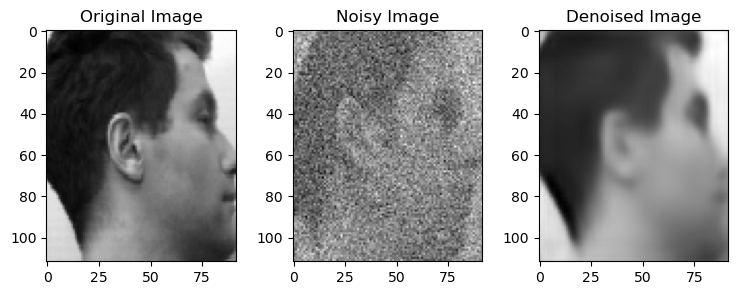

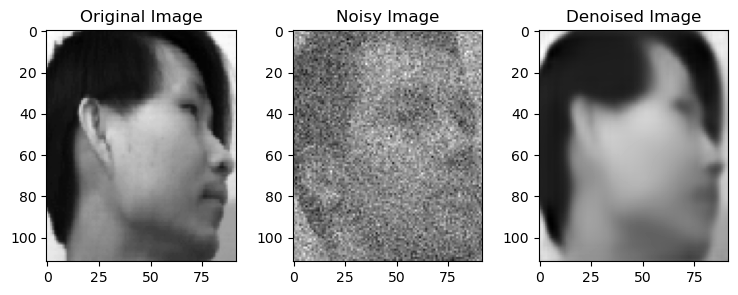

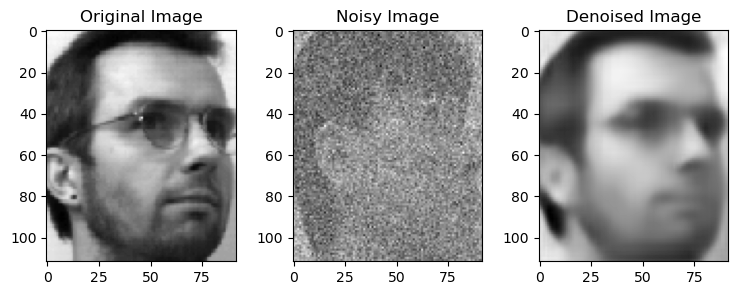

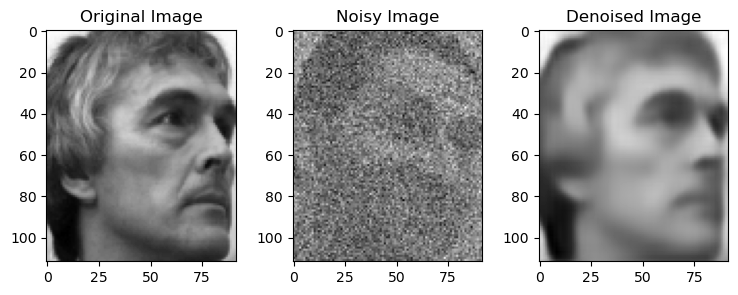

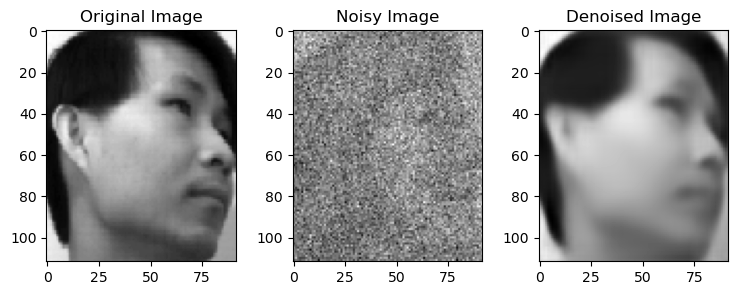

In [20]:
# Visualizing the original data, noisy data, and denoised data
num_samples_to_visualize = 5

for i in range(num_samples_to_visualize):
    sample_index = np.random.randint(0, X_val.shape[0])

    original_sample = X_val[sample_index]
    noisy_sample = X_train_noisy[sample_index]
    denoised_sample = denoised_data[sample_index]

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.imshow(original_sample.reshape(112, 92), cmap='gray')
    plt.title('Original Image')

    plt.subplot(132)
    plt.imshow(noisy_sample.reshape(112, 92), cmap='gray')
    plt.title('Noisy Image')

    plt.subplot(133)
    plt.imshow(denoised_sample.reshape(112, 92), cmap='gray')
    plt.title('Denoised Image')

    plt.show()

In [9]:
# Define a function to create the model
def create_model(loss_function='mean_squared_error', learning_rate=0.001, activation='relu'):
    # Encoder
    input_img = keras.layers.Input(shape=input_shape)
    x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    code = keras.layers.Conv2D(code_size, (3, 3), activation='relu', padding='same')(x)

    # Decoder
    x = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(code)
    x = keras.layers.UpSampling2D((2, 2))(x)
    x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = keras.layers.UpSampling2D((2, 2))(x)
    decoded = keras.layers.Conv2D(1, (3, 3), activation=activation, padding='same')(x)

    autoencoder = keras.models.Model(input_img, decoded)
    autoencoder.compile(optimizer=Adam(lr=learning_rate), loss=loss_function)
    return autoencoder




In [10]:
# Define the hyperparameters to tune
param_grid = {
    'loss_function': ['mean_squared_error', 'mean_absolute_error'],
    'learning_rate': [0.001, 0.01, 0.1],
    'activation': ['relu', 'sigmoid']
}

In [12]:
# Create a KerasRegressor
model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=1)

# Create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit the GridSearchCV object to the data
grid_result = grid.fit(X_train_noisy, X_train)

Epoch 1/50
10/10 [==============================] - 1s 32ms/step - loss: 0.0840
Epoch 2/50
10/10 [==============================] - 0s 29ms/step - loss: 0.0266
Epoch 3/50
10/10 [==============================] - 0s 28ms/step - loss: 0.0130
Epoch 4/50
10/10 [==============================] - 0s 29ms/step - loss: 0.0084
Epoch 5/50
10/10 [==============================] - 0s 28ms/step - loss: 0.0060
Epoch 6/50
10/10 [==============================] - 0s 29ms/step - loss: 0.0046
Epoch 7/50
10/10 [==============================] - 0s 29ms/step - loss: 0.0040
Epoch 8/50
10/10 [==============================] - 0s 29ms/step - loss: 0.0037
Epoch 9/50
10/10 [==============================] - 0s 29ms/step - loss: 0.0035
Epoch 10/50
10/10 [==============================] - 0s 29ms/step - loss: 0.0034
Epoch 11/50
10/10 [==============================] - 0s 28ms/step - loss: 0.0033
Epoch 12/50
10/10 [==============================] - 0s 29ms/step - loss: 0.0032
Epoch 13/50
10/10 [==================

In [13]:
# Print the best hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.002639 using {'activation': 'relu', 'learning_rate': 0.001, 'loss_function': 'mean_squared_error'}
